## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Business Understanding

# Data Understanding

In [ ]:
#Add a part where there is a description for the data used
#The waterfront to fill or delte moves to data prep
#Use a correlation matrix to understand the data more
#Fill out the questions of Data Understanding in the markdown section
#Descriptive statistis for each of the features used
#check shape is correct
#Add a new column for missing Waterfront prop? No, if we included view maybe

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)

In [130]:
#Import of data to explore
df = pd.read_csv('data/kc_house_data.csv', index_col=0)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Most descriptive attributes for quality of homes

In [ ]:
"""
Categorical texts: Waterfront, conditon, Grade
Waterfront - Boolean
Condition: 
Grade:
"""


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   view           21534 non-null  object 
 9   condition      21597 non-null  object 
 10  grade          21597 non-null  object 
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   17755 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float

In [131]:
#Ignore these column at a minimum level Write assumption from the beginning data
""" Ignore data, view, sqft_above, sqft_basement, yr_renovated, zipcode,lat ,long ,sqft_living15, sqft_lot15"""

# New 
kc_df = df.drop(["date","view", "sqft_above", "sqft_basement", "yr_renovated","lat" ,"long" ,"sqft_living15", "sqft_lot15"], axis = 1)
kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,,,,,,,,,,,
7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
6414100192,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
5631500400,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
2487200875,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
1954400510,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


In [130]:
kc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.0+ MB


In [38]:
kc_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


In [43]:
kc_df[["condition"]].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
dtype: int64

In [44]:
kc_df[["grade"]].value_counts()

grade        
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
dtype: int64

In [145]:
kc_df[kc_df["waterfront"].isna()]["grade"].value_counts()

7 Average        1000
8 Good            656
9 Better          295
6 Low Average     228
10 Very Good      116
11 Excellent       42
5 Fair             30
12 Luxury           7
4 Low               2
Name: grade, dtype: int64

# Use Zipcode to understand


In [115]:
#Zipcode group by to create focus of data set to predict with in the future
zip_df = kc_df.groupby(["grade", "zipcode"], sort = True).count()
a = zip_df.sort_values("grade", ascending = True)
a

In [132]:
#Remove the duplicate rows
kc_df = kc_df.drop_duplicates()
kc_df.duplicated().sum()

0

Usually it is better to fill in "NaN" after train and test split to prevent data leakage.  
Because filling in unknown as no effect on the other values decided to do it before.

In [218]:
#Fill in unknowns, this is best done after split, to limit data leakage.  I
kc_df["waterfront"].fillna("Unk", inplace = True)

#Check NaN Count
kc_df[["waterfront"]].value_counts()
kc_df[["waterfront"]].isna().sum()

waterfront    0
dtype: int64

# Graphs and Correlation

In [ ]:
#Data graphs of values categories and continous

In [ ]:
#Change the variables of the categories Waterfront, Condition and Grade
# https://github.com/learn-co-curriculum/dsc-sklearn-preprocessing-lab Multiple categorie 
#Inspect the value count of each of these
#When do we split the data into train and polynomial transformation?
#plot data for linearity,scatter, histogram values for normal dist
#study of correlation, heatmap before split

# Basic Model


In [219]:
#split data
#Correlation of numerical values

from sklearn.model_selection import train_test_split

X = kc_df.drop("price", axis=1)
y = kc_df["price"]

X_train , X_test, y_train, y_test = train_test_split(X,y, test_size=.30,random_state=42)

Visualization of target variable

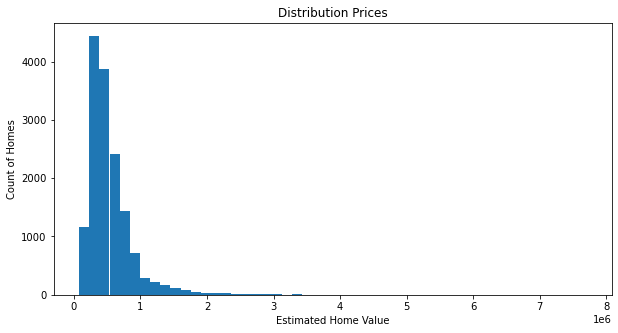

In [114]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=50)

ax.set_xlabel("Estimated Home Value")
ax.set_ylabel("Count of Homes")
ax.set_title("Distribution Prices");

In [30]:
# Plot after turning things to non categorical
#plt.scatter(df['x'], df['y'], color='green', s=50, marker='.');

KeyError: 'x'

In [1]:
"""You'll start modeling b
y choosing the feature that is most correlated with our target, 
and build and evaluate a linear regression model with just that feature."""

"You'll start modeling b\ny choosing the feature that is most correlated with our target, \nand build and evaluate a linear regression model with just that feature."

In [115]:
#Correlates numerical data, Year built and zip code count as categorical
import seaborn as sns
import numpy as np

corr_data = pd.concat([y_train, X_train], axis=1)
corr = corr_data.corr()

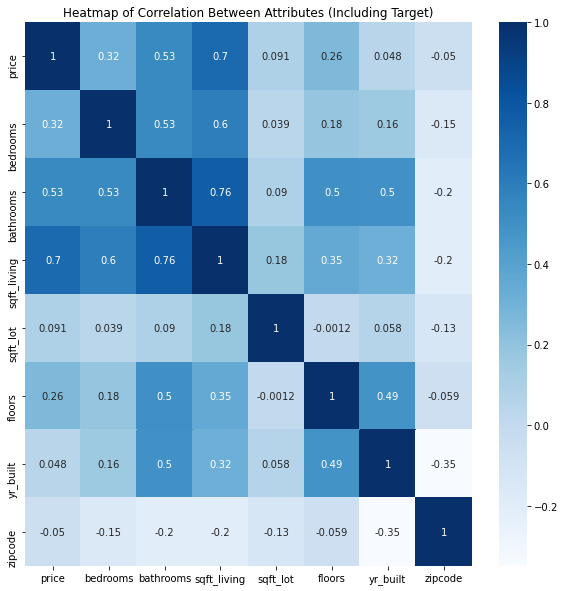

In [27]:

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    #mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    #Color of the heatmap
    cmap="Blues",
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    #cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

In [116]:
#Strongest numerical feature from the heatmap

most_correlated_feature = "sqft_living"

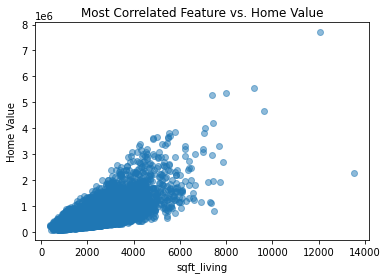

In [117]:
#Plot a scatter plot "Most Correlated Feature vs. Home Value"
fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("Home Value")
ax.set_title("Most Correlated Feature vs. Home Value");

In [236]:
kc_df = kc_df.drop("bathrooms", axis = 1)


In [118]:
#Reshape training data
X_train[most_correlated_feature]
X_array = np.array(X_train[most_correlated_feature])
newarr = X_array.reshape(-1,1)

In [119]:
#Reshape training data
X_test[most_correlated_feature]
X_array_test = np.array(X_test[most_correlated_feature])
newarr_test = X_array_test.reshape(-1,1)

In [120]:
# Log Transformation
from sklearn.preprocessing import FunctionTransformer

# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)

# Fit transformers
log_transformer.fit(newarr)

# Transform training data
X_train_log = pd.DataFrame(log_transformer.transform(newarr),columns= ["sqft_living"], index=X_train.index)

# Transform testing data
X_test_log = pd.DataFrame(log_transformer.transform(newarr_test),columns= ["sqft_living"], index=X_test.index)

In [121]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [86]:
X_train_log

,sqft_living
id,
8682300890,7.774856
8073000550,8.067776
7212680850,7.455877
8880600070,7.533694
7226500100,7.955074
...,...
7853230570,7.709757
4140940150,7.926603
8658300480,7.333023


In [123]:
linreg.fit(X_train_log, y_train)
LinearRegression()

LinearRegression()

In [124]:
y_hat_train = linreg.predict(X_train_log)
y_hat_test = linreg.predict(X_test_log)

In [125]:
from sklearn.metrics import mean_squared_error

In [134]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
Model_train_score = linreg.score(X_train_log,y_train)
Model_score = linreg.score(X_test_log,y_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)


Train Mean Squared Error: 84776097457.16399
Test Mean Squared Error:  83637342080.55116
Train Model Score:  0.3764278159506643
Test Model Score:  0.369243516519262


In [128]:
#Do I need to get teh MAE and RMSE as well? Reference Template solutions GP if so


Test Mean Squared Error is better than the Training Error. The base model score R2 is only .36. This base mode isn't strong enough to support predicting prices.  There may be better features or a combination of a few that hopefully will increade the score.

# Second Model with cat and continuous features

In [160]:
#Convert categorical features into numbers - some are numbers with categories as well
# Run this cell without changes

print(X_train["waterfront"].value_counts())
print()
print(X_train["condition"].value_counts())
print()
print(X_train["grade"].value_counts())

NO     13364
YES      103
Name: waterfront, dtype: int64

Average      9834
Good         3943
Very Good    1200
Fair          123
Poor           17
Name: condition, dtype: int64

7 Average        6265
8 Good           4293
9 Better         1803
6 Low Average    1405
10 Very Good      806
11 Excellent      280
5 Fair            177
12 Luxury          64
4 Low              16
13 Mansion          7
3 Poor              1
Name: grade, dtype: int64


In [ ]:
#Model the features 
#https://github.com/Dmvinedata/linear_regression_guided_practice/blob/master/2022-08-15/.ipynb_checkpoints/linear_regression_advanced-checkpoint.ipynb

Bedrooms


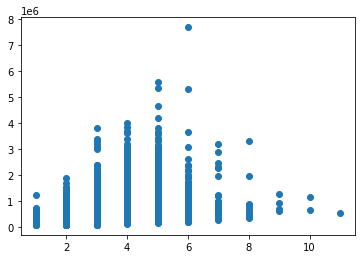

Bathrooms


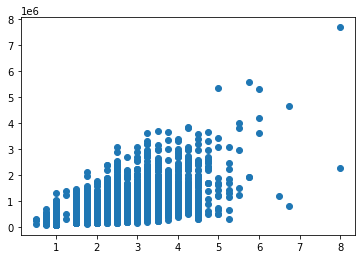

Sqft_Living


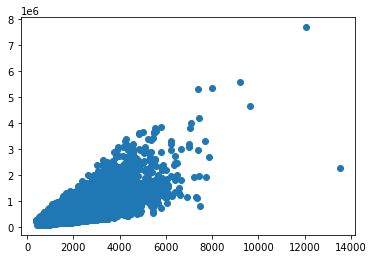

Sqft_Lot


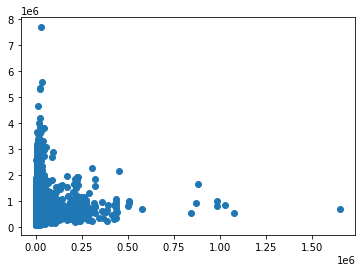

Floors


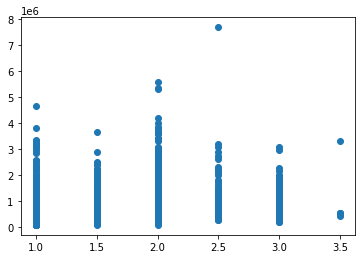

Condition


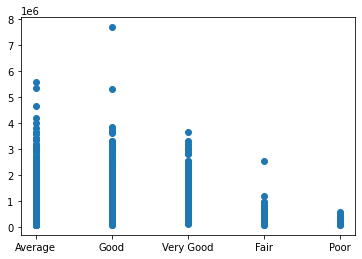

Grade


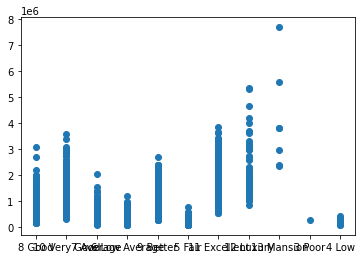

Yr_Built


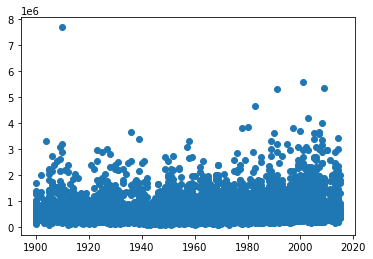

Zipcode


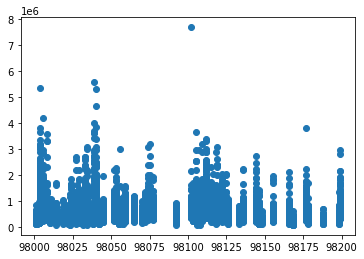

In [146]:
X_temp = X_train.drop ("waterfront", axis = 1 )
X_temp
for c in X_temp.columns:
    print(c.title())
    plt.scatter(X_temp[c], y_train)
    plt.show()

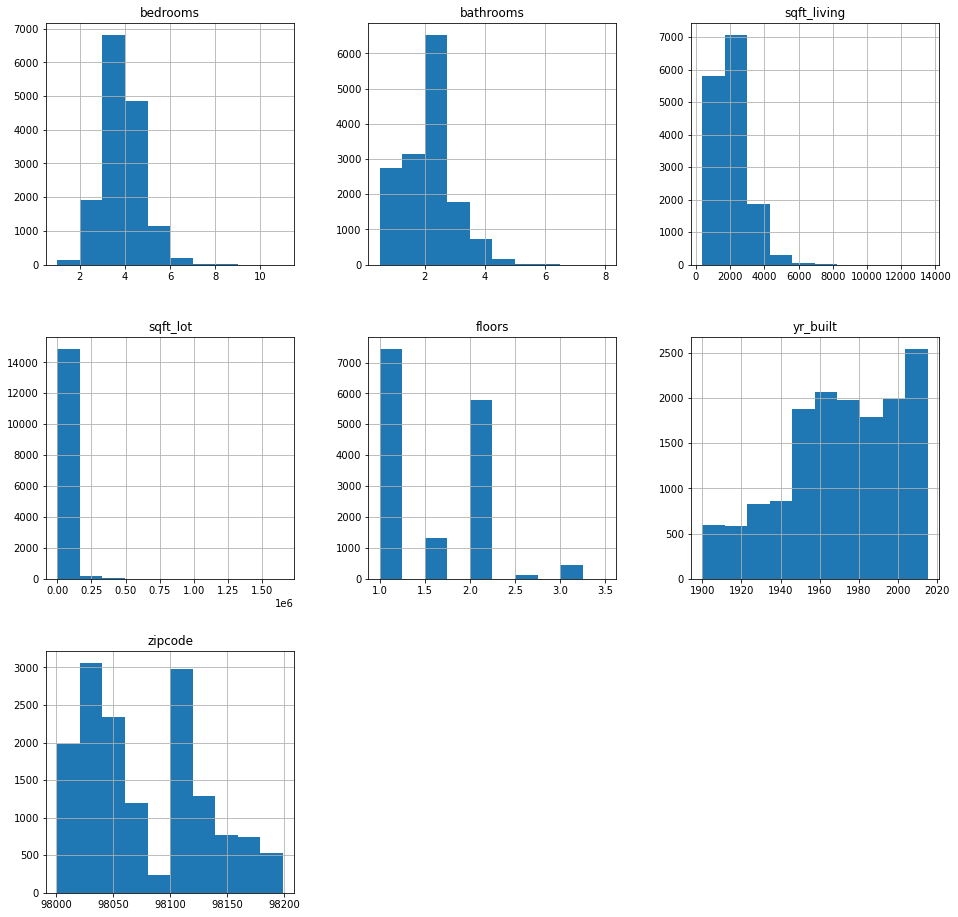

In [152]:
X_train[continuous].hist(figsize  = [16, 16]);

In [314]:
#  import OneHotEncoder from sklearn.preprocessing
from sklearn.preprocessing import OneHotEncoder, Normalizer

continuous = ['bedrooms', 'sqft_living','sqft_lot','floors',"yr_built", "zipcode"]
categoricals = ['waterfront', 'condition', 'grade']

X = kc_df.drop("price", axis=1)
y = kc_df["price"]

# Create new split
X_train_sec, X_test_sec, y_train_sec, y_test_sec = train_test_split(X, y, test_size=.3, random_state=42)

In [315]:
#Setting column names for one hot encoded variables - Ref https://www.codementor.io/@abdelfettahbesbes/one-hot-encoding-in-data-science-1pe0lftu21
categoricals
cat_cols_encoded = []
for col in categoricals:
    cat_cols_encoded += [f"{col[0:2]}_{cat}" for cat in list(X[col].unique())]
cat_cols_encoded

['wa_Unk',
 'wa_NO',
 'wa_YES',
 'co_Average',
 'co_Very Good',
 'co_Good',
 'co_Poor',
 'co_Fair',
 'gr_7 Average',
 'gr_6 Low Average',
 'gr_8 Good',
 'gr_11 Excellent',
 'gr_9 Better',
 'gr_5 Fair',
 'gr_10 Very Good',
 'gr_12 Luxury',
 'gr_4 Low',
 'gr_3 Poor',
 'gr_13 Mansion']

In [281]:
['wa_Unk','co_Average','gr_7 Average']

array(['Unk', 'NO', 'YES'], dtype=object)

In [316]:


# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(sparse=False) # did not drop the first one
scaler = Normalizer()

# Fit and/or transform - Better
X_train_log = log_transformer.fit_transform(X_train_sec[continuous])
X_train_scale = scaler.fit_transform(X_train_log )
X_train_ohe = ohe.fit_transform(X_train_sec[categoricals])




#Concatenate transformed data
X_train_sec = pd.concat([
        pd.DataFrame(X_train_scale, columns= continuous, index=X_train_sec.index),
        pd.DataFrame(X_train_ohe, columns = cat_cols_encoded, index=X_train_sec.index)
    ], axis=1)

    
# Transform and concatenate test data
log_X_test = log_transformer.transform(X_test_sec[continuous])
normalized_X_test = scaler.transform (log_X_test)

#Remember there might be data leackage with using the same columsn for test
X_test_sec = pd.concat([
    pd.DataFrame(normalized_X_test,columns= continuous, index=X_test_sec.index),
    pd.DataFrame(ohe.transform(X_test_sec[categoricals]),columns = cat_cols_encoded,index=X_test_sec.index)
], axis=1)

In [317]:
#Drop the first col of each ohe CAT 
X_train_sec= X_train_sec.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)
X_test_sec= X_test_sec.drop(['wa_Unk','co_Average','gr_7 Average'], axis=1)

In [318]:
linreg2 = LinearRegression()

In [319]:
linreg2.fit(X_train_sec, y_train_sec)

LinearRegression()

In [320]:
y_hat_train = linreg2.predict(X_train_sec)
y_hat_test = linreg2.predict(X_test_sec)

In [321]:
train_mse = mean_squared_error(y_train_sec, y_hat_train)
test_mse = mean_squared_error(y_test_sec, y_hat_test)
Model_train_score = linreg2.score(X_train_sec,y_train_sec)
Model_score = linreg2.score(X_test_sec, y_test_sec)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Train Model Score: ', Model_train_score)
print('Test Model Score: ', Model_score)



Train Mean Squared Error: 46830288899.16625
Test Mean Squared Error:  45818657876.480125
Train Model Score:  0.6512744929271215
Test Model Score:  0.6644741730294157


With the results of the second model, it seems that the model is overfit for the training model.
The MSE an R2 are higher now that we used more of the data and transformed the categories with OHE.

# Investigating Multicollinearity

In [322]:
import statsmodels.api as sm

sm.OLS(y_train_sec, sm.add_constant(X_train_sec)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     1281.
Date:                Mon, 19 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:34:56   Log-Likelihood:            -2.0711e+05
No. Observations:               15113   AIC:                         4.143e+05
Df Residuals:                   15090   BIC:                         4.144e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.845e+07    1.1e+06     16.832      0.000    1.63e+07    2.06e+07
bedrooms         -1.673e+06    1.6e+05    -10.437      0.000   -1.99e+06   -1.36e+06
sqft_living      -1.345e+06   4.54e+05     -2.962      0.003   -2.24e+06   -4.55e+05
sqft_lot         -9.676e+06   5.65e+05    -17.117      0.000   -1.08e+07   -8.57e+06
floors           -6.834e+05   1.37e+05     -5.003      0.000   -9.51e+05   -4.16e+05
yr_built         -1.176e+08   2.74e+06    -43.010      0.000   -1.23e+08   -1.12e+08
zipcode           5.864e+07   1.85e+06     31.692      0.000     5.5e+07    6.23e+07
wa_NO             -622.4567   5637.369     -0.110      0.912   -1.17e+04    1.04e+04
wa_YES            7.247e+05   2.23e+04     32.480      0.000    6.81e+05    7.68e+05
co_Very Good      -2.14e+04   1.98e+04     -1.081      0.280   -6.02e+04    1.74e+04
co_Good           2.563e+04   4402.518      5.822      0.000     1.7e+04    3.43e+04
co_Poor          -7.325e+04   6.08e+04     -1.205      0.228   -1.92e+05    4.59e+04
co_Fair           6.916e+04   7096.541      9.745      0.000    5.52e+04    8.31e+04
gr_6 Low Average  3.206e+05    1.5e+04     21.441      0.000    2.91e+05     3.5e+05
gr_8 Good          8.57e+05   2.97e+04     28.883      0.000    7.99e+05    9.15e+05
gr_11 Excellent   2.379e+06   6.32e+04     37.632      0.000    2.25e+06     2.5e+06
gr_9 Better       -5.71e+05   2.17e+05     -2.629      0.009   -9.97e+05   -1.45e+05
gr_5 Fair        -5.469e+05   4.94e+04    -11.075      0.000   -6.44e+05    -4.5e+05
gr_10 Very Good  -6.327e+05   2.07e+04    -30.540      0.000   -6.73e+05   -5.92e+05
gr_12 Luxury     -6.043e+05   1.23e+04    -49.010      0.000   -6.28e+05    -5.8e+05
gr_4 Low         -5.395e+05   9749.332    -55.339      0.000   -5.59e+05    -5.2e+05
gr_3 Poor        -4.354e+05   8965.474    -48.567      0.000   -4.53e+05   -4.18e+05
gr_13 Mansion    -2.407e+05   9257.215    -25.996      0.000   -2.59e+05   -2.23e+05
==============================================================================
Omnibus:                     9359.598   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           347379.651
Skew:                           2.409   Prob(JB):                         0.00
Kurtosis:                      25.988   Cond. No.                     2.80e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Looks like there is a lot of multicolinearity in the model. We will select only a few features

# 3rd Model with kfold cross validation

In [ ]:
#2nd iteration of the model with kfold instead of test split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler


In [ ]:
#Second Model
#Fit Linear Reg model using cross validat - linear reg lego mode
#Predict with values
#wRITE UP INFORMATION and results

In [ ]:
#Do stats model on third model
#Pair down best features to use with CI, R2 and P value
#Go to the lesson where there was a pair down using RFECV.


In [ ]:
#Create a third model with the best features to use
#After the best R2 reached plot somehow
#Report error



In [ ]:
#Final Model 

In [ ]:
#Interpret Model  - msE LOOK AT linear regression lab to see BUSINESS interpretation

In [ ]:
#Transform data set by changing the condition or grade and try to predict on final model